In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,186 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib import rc

matplotlib.rc("font", family="Malgun Gothic")
plt.rc('font', family='NanumBarunGothic')

In [25]:
df_broad = pd.read_csv("/gdrive/MyDrive/POSCO_TeamProject/data/Broad_Casting.csv")
df_crew = pd.read_csv("/gdrive/MyDrive/POSCO_TeamProject/data/Crew_group.csv")
df_product = pd.read_csv("/gdrive/MyDrive/POSCO_TeamProject/data/Product.csv")
df_total = pd.read_csv("/gdrive/MyDrive/POSCO_TeamProject/data/total0823_night.csv", encoding="euc-kr")

# 1. 방송구분과 주문수량 및 주문금액 관계
## 1) 생방/녹방/재방의 빈도(=방송횟수) 확인\
### * **T-커머스 - 녹화방송만 가능**
### * **TV 홈쇼핑 - "생방"/녹방/재방 모두 가능**

생방송     18706
재방송      7538
녹화방송       39
Name: 방송구분, dtype: int64


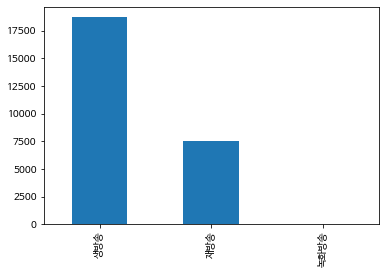

In [27]:
df_count1 = df_broad["방송구분"].value_counts()
print(df_count1)
df_count1.plot.bar()

## 2) 생방/녹방/재방의 주문수량 및 주문금액 확인

In [11]:
#1. 방송구분과 주문수량 및 주문금액 관계

df_broad.groupby(["방송구분"]).mean()[["상품주문수량", "상품주문금액"]].sort_values(by="상품주문금액", ascending=False)
# df_broad.groupby(["방송구분"]).mean()[["상품주문수량", "상품주문금액"]].sort_values(by="상품주문수량", ascending=False)

,상품주문수량,상품주문금액
방송구분,,
생방송,1154.316529,8.216732e+07
재방송,437.807774,2.587536e+07
녹화방송,337.871795,1.984231e+07


## 주문수량과 주문금액은 생방송 > 재방송 > 녹화방송 순이다.
## ***생방송을 TV홈쇼핑의 강점으로 삼으면 되지 않을까?***

# 2. 카테고리와 상품취소수량/상품취소금액/상품주문수량/상품주문금액 관계
## 1) 카테고리별 빈도(=방송횟수) 확인

의류        2376
신선농산      2314
생활용품      2076
건강식품      1969
인테리어      1958
침구        1657
신선수산      1570
잡화        1379
가공농산      1371
주방용품      1200
가공축산      1166
이미용       1086
가전        1002
가공수산       926
보석         895
상생_식품      533
레포츠기기      528
언더웨어       501
신선축산       461
문화서비스      445
상생_공산품     376
레포츠의류      240
상조          87
Name: 카테고리, dtype: int64


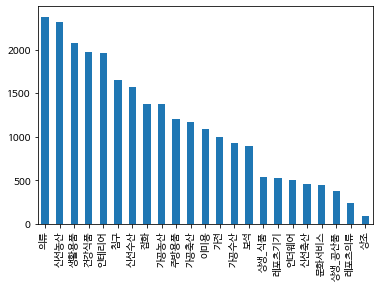

In [28]:
df_count2 = df_total["카테고리"].value_counts().sort_values(ascending=False)
print(df_count2)
df_count2.plot.bar()

# 카테고리 별 방송횟수 순위
##1. 의류
##2. 신선농산
##3. 생활용품
##4. 건강식품
##5. 인테리어

## 2) 카테고리별 상품취소수량 및 상품취소금액

In [29]:
#A. 상품취소수량 순
df_total.groupby(["카테고리"]).mean()[["상품취소수량", "상품취소금액"]].sort_values(by="상품취소수량", ascending=False)

,상품취소수량,상품취소금액
카테고리,,
의류,83.351852,6.197485e+06
신선농산,66.910977,2.960591e+06
신선축산,57.952278,3.000181e+06
가공축산,53.942539,2.581347e+06
상생_식품,50.011257,2.146001e+06
신선수산,49.485350,2.481948e+06
레포츠의류,48.420833,2.053240e+06
가공농산,47.245077,1.997971e+06
가공수산,45.970842,2.139758e+06


# 카테고리 별 상품취소수량 순위
##1. 의류
##2. 신선농산
##3. 신선축산
##4. 가공축산
##5. 이미용_기타

In [30]:
#B. 상품취소금액 순
df_total.groupby(["카테고리"]).mean()[["상품취소수량", "상품취소금액"]].sort_values(by="상품취소금액", ascending=False)

,상품취소수량,상품취소금액
카테고리,,
상조,1.908046,8.652770e+06
보석,5.820112,6.778307e+06
의류,83.351852,6.197485e+06
잡화,33.112400,5.391754e+06
문화서비스,3.253933,4.753648e+06
가전,25.362275,4.248555e+06
인테리어,7.688458,3.390469e+06
레포츠기기,22.492424,3.234922e+06
신선축산,57.952278,3.000181e+06


# 카테고리 별 상품취소금액 순위
##1. 상조
##2. 보석
##3. 의류
##4. 잡화
##5. 문화서비스

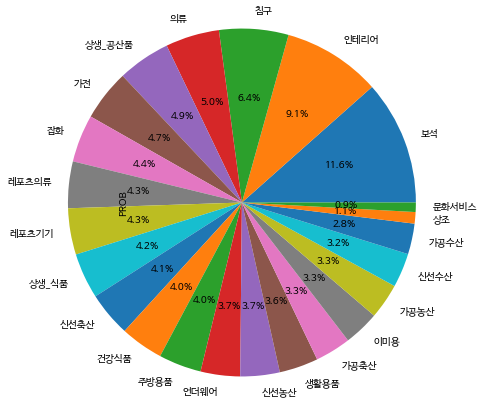

In [31]:
#C. 상품취소수량 / 상품주문수량 순
df_prac1 = df_total.groupby(["카테고리"]).mean()[["상품취소수량", "상품주문수량"]]

ds_c = pd.DataFrame(columns = ["카테고리", "PROB"])
for name, row in df_prac1.iterrows():
  ds_c = ds_c.append({"카테고리" : name , "PROB" : (row[0]/row[1]) * 100}, ignore_index = True )

ds_c.sort_values(by="PROB", ascending=False, inplace=True)

ds_c.plot.pie(y = "PROB", labels = ds_c["카테고리"], autopct= "%.1f%%", radius = 2, legend = False)

# 카테고리별 상품주문수량 대비 상품취소수량 순위

##1. 보석
##2. 인테리어
##3. 침구
##4. 이미용_기타
##5. 의류

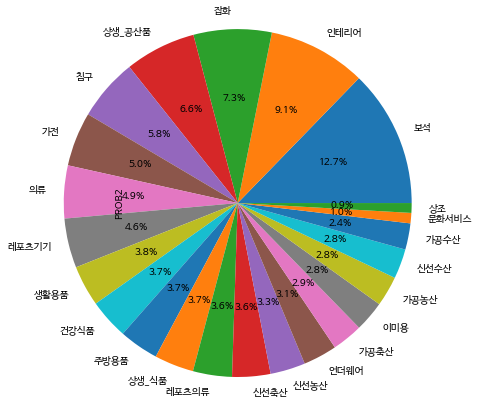

In [32]:
#D. 상품취소금액 / 상품주문금액 순
df_prac1 = df_total.groupby(["카테고리"]).mean()[["상품취소금액", "상품주문금액"]]

ds_c2 = pd.DataFrame(columns = ["카테고리", "PROB2"])
for name, row in df_prac1.iterrows():
  ds_c2 = ds_c2.append({"카테고리" : name , "PROB2" : (row[0]/row[1]) * 100}, ignore_index = True )

ds_c2.sort_values(by="PROB2", ascending=False, inplace=True)

ds_c2.plot.pie(y = "PROB2", labels = ds_c2["카테고리"], autopct= "%.1f%%", radius = 2, legend = False)

# 카테고리별 상품주문금액 대비 상품취소금액
##1. 보석
##2. 인테리어
##3. 잡화
##4. 상생_공산품
##5. 침구

# 3. 카테고리 및 상품 단가 확인

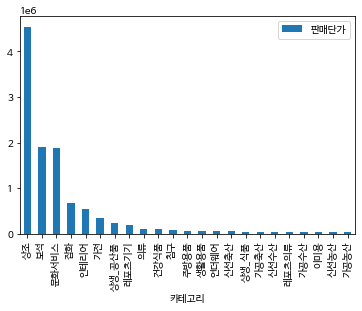

In [33]:
df_cs = df_total[['카테고리','판매단가']].groupby(["카테고리"]).mean().sort_values(by="판매단가", ascending=False)
df_cs.plot.bar()

## 판매단가는 상조 > 보석 > 문화서비스 순이다.

# 4. 상품주문수량 및 상품주문금액과 ARS 할인률(판매단가 대비 ARS금액) 관계
## - ARS 할인률이 높을 수록 고객은 상품을 많이 주문할까?

## (참고사항)
## ***그룹사 연계 활동이 어려운 홈앤쇼핑과 공영쇼핑은 자체 프로모션을 통해 소비자 유입 및 단골 고객 확보에 주력할 전망***

---


##  홈앤쇼핑은 TV에만 한정돼 있던 고객을 모바일 앱으로 이동시키기 위해 파격적 혜택인 ***10% 즉시 할인과 10% 적립금을 지급하는 ‘텐텐’ 전략***을 앞세웠다. 그결과 설립 5년만에 취급액 2조원을 달성했다는 설명이다.

## 1) 상품주문수량과 ARS 할인률

648


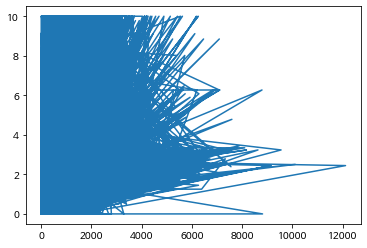

In [34]:
df_prac3 = df_total[["상품주문수량", "ARS금액", "판매단가"]]
ds_c3 = pd.DataFrame(columns = ["상품주문수량", "ARS할인률"])
print(df_prac3["상품주문수량"][0])
for idx, row in df_prac3.iterrows():
    ds_c3 = ds_c3.append({"상품주문수량" : df_prac3["상품주문수량"][idx] , "ARS할인률" : (row[1]/row[2]) * 100}, ignore_index = True )

plt.plot(ds_c3["상품주문수량"], ds_c3["ARS할인률"])

# 2) 상품주문금액과 ARS 할인률

86284484


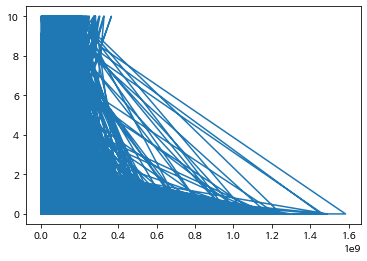

In [35]:
df_prac3 = df_total[["상품주문금액", "ARS금액", "판매단가"]]
ds_c3 = pd.DataFrame(columns = ["상품주문금액", "ARS할인률"])
print(df_prac3["상품주문금액"][0])
for idx, row in df_prac3.iterrows():
    ds_c3 = ds_c3.append({"상품주문금액" : df_prac3["상품주문금액"][idx] , "ARS할인률" : (row[1]/row[2]) * 100}, ignore_index = True )

plt.plot(ds_c3["상품주문금액"], ds_c3["ARS할인률"])

### 결론: ARS 할인으로 인한 주문량과 판매액은 늘어나지 않는다. 즉, ARS 할인은 주문수량과 주문금액을 늘리는 데 도움이 되지 않는다.
##***그렇다면 더 큰 할인을 제공하거나 적립금 지급과 같은 전략을 세우는 건 어떨까?***

# 5. 월별 카테고리 기준 총 상품판매수량 및 총 상품판매금액 관계

In [36]:
#2020년과 2021년 데이터 생성

df_year_month = df_total[["year", "month", "카테고리", "상품주문수량", "상품주문금액"]].groupby(["year", "month", "카테고리"]).sum()

df_2020 = pd.DataFrame(columns = ["month", "카테고리", "상품주문수량", "상품주문금액"])
df_2021 = pd.DataFrame(columns = ["month", "카테고리", "상품주문수량", "상품주문금액"])

index2020 = 0
index2021 = 0

for idx in df_year_month.index:
  if idx[0] == 2020:
    df_2020 = df_2020.append({"month": idx[1] , "카테고리": idx[2], "상품주문수량": df_year_month["상품주문수량"].iloc[index2020], "상품주문금액": df_year_month["상품주문금액"].iloc[index2020]}, ignore_index=True)
    index2020+=1
  elif idx[0] == 2021:
    df_2021 = df_2021.append({"month": idx[1] , "카테고리": idx[2], "상품주문수량": df_year_month["상품주문수량"].iloc[index2021], "상품주문금액": df_year_month["상품주문금액"].iloc[index2021]}, ignore_index=True)
    index2021+=1
print(df_2020)
print()
print(df_2021)

    month  카테고리 상품주문수량      상품주문금액
0       1  가공농산  80976  3324830993
1       1  가공수산  44929  2117461829
2       1  가공축산  83645  3846306369
3       1    가전  24842  3024923946
4       1  건강식품  51331  4140052976
..    ...   ...    ...         ...
254    12   이미용  58563  2971717681
255    12  인테리어   3626  2009671419
256    12    잡화  46600  6286418580
257    12  주방용품  12768   800895234
258    12    침구  18234  1352983380

[259 rows x 4 columns]

    month  카테고리  상품주문수량      상품주문금액
0       1  가공농산   80976  3324830993
1       1  가공수산   44929  2117461829
2       1  가공축산   83645  3846306369
3       1    가전   24842  3024923946
4       1  건강식품   51331  4140052976
..    ...   ...     ...         ...
248    11   이미용   47677  2925137505
249    11  인테리어  231903  8216661844
250    11    잡화   98604  4494042733
251    11  주방용품   28027  1314751083
252    11    침구   13227   629415336

[253 rows x 4 columns]


## 1) 2020년 1월 vs 2021년 1월

In [37]:
#1-1. 상품주문수량 기준
print("### 상품주문수량 기준 ###\n")

#A. 2020년 1월
print("A. 2020년 1월")
df_2020_1A = df_2020.query('month==1').drop(["month"], axis=1).sort_values(by="상품주문수량", ascending=False, ignore_index=True).drop("상품주문금액", axis=1, inplace=False)
print(df_2020_1A)

print()

#B. 2021년 1월
print("B. 2021년 1월")
df_2021_1A = df_2021.query('month==1').drop(["month"], axis=1).sort_values(by="상품주문수량", ascending=False, ignore_index=True).drop("상품주문금액", axis=1, inplace=False)
print(df_2021_1A)

### 상품주문수량 기준 ###

A. 2020년 1월
     카테고리  상품주문수량
0    신선농산  175728
1      의류  161894
2    신선수산  102276
3    가공축산   83645
4    가공농산   80976
5     이미용   65109
6    주방용품   58921
7    건강식품   51331
8    가공수산   44929
9      잡화   38190
10   생활용품   33181
11  레포츠의류   30578
12   신선축산   28056
13   언더웨어   25324
14     가전   24842
15     침구   21734
16  레포츠기기   13443
17   인테리어    5410
18  상생_식품    4805
19  문화서비스    3424
20     상조     240

B. 2021년 1월
      카테고리  상품주문수량
0       상조  175728
1     신선축산  161894
2     생활용품  102276
3     가공축산   83645
4     가공농산   80976
5     언더웨어   65109
6     인테리어   58921
7     주방용품   56507
8     건강식품   51331
9     가공수산   44929
10      침구   39077
11     이미용   38190
12   상생_식품   33181
13   레포츠의류   30578
14    신선농산   28056
15    신선수산   25324
16      가전   24842
17      잡화   21734
18   레포츠기기   13443
19      의류    5410
20      보석    4805
21   문화서비스    3424
22  상생_공산품     240


In [38]:
#1-2. 상품주문금액 기준
print("### 상품주문금액 기준 ###\n")

#A. 2020년 1월
print("A. 2020년 1월")
df_2020_1B = df_2020.query('month==1').drop(["month"], axis=1).sort_values(by="상품주문금액", ascending=False, ignore_index=True).drop("상품주문수량", axis=1, inplace=False)
print(df_2020_1B)

print()

#B. 2021년 1월
print("B. 2021년 1월")
df_2021_1B = df_2021.query('month==1').drop(["month"], axis=1).sort_values(by="상품주문금액", ascending=False, ignore_index=True).drop("상품주문수량", axis=1, inplace=False)
print(df_2021_1B)

### 상품주문금액 기준 ###

A. 2020년 1월
     카테고리       상품주문금액
0      의류  15830344361
1      잡화   7627925160
2    신선농산   7316020075
3   문화서비스   5762790866
4    신선수산   5023950677
5    건강식품   4140052976
6    가공축산   3846306369
7    주방용품   3828837012
8     이미용   3327733714
9    가공농산   3324830993
10     가전   3024923946
11   생활용품   2649546104
12  레포츠기기   2289081804
13   인테리어   2163246721
14   가공수산   2117461829
15   신선축산   1795211914
16     침구   1694876385
17   언더웨어   1464756561
18  레포츠의류   1197590587
19     상조   1069090800
20  상생_식품    231162142

B. 2021년 1월
      카테고리       상품주문금액
0     신선축산  15830344361
1      이미용   7627925160
2       상조   7316020075
3    문화서비스   5762790866
4     생활용품   5023950677
5     건강식품   4140052976
6     가공축산   3846306369
7     인테리어   3828837012
8     언더웨어   3327733714
9     가공농산   3324830993
10      가전   3024923946
11   상생_식품   2649546104
12    주방용품   2387379769
13   레포츠기기   2289081804
14      의류   2163246721
15    가공수산   2117461829
16      침구   1847658360
17    신선농산   17952

## ***2021년 1월에 상조가 상위권으로 올라온 것을 보니 코로나 19의 영향이 있었던 걸까?***

# 6. 카테고리별 구매의사철회율 

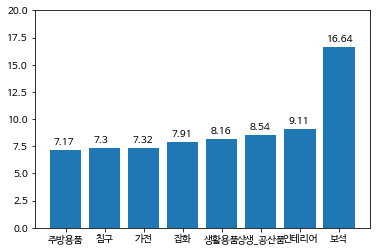

In [39]:
prac1 = df_total.groupby(["카테고리"], as_index=False)["구매의사철회율"].mean().sort_values(by="구매의사철회율", ascending=True).tail(8)

cate = prac1["카테고리"].tolist()
number_of_goals = prac1["구매의사철회율"].tolist()
xs = [i for i, _ in enumerate(cate)]

plt.bar(xs, number_of_goals)  # 해당 인덱스에 일치하는 값을 가진, 바 형태 그래프 생성
plt.xticks([i for i, _ in enumerate(cate)], cate)  # x 눈금 및 레이블 설정 
plt.ylim(0, 20)  # y 범위 설정 (start, end)

for index, value in enumerate(number_of_goals):
  plt.text(index- 0.3 , value + 0.5, str(round(value, 2)))  # x 좌표, y 좌표, text
plt.show()

# 7. 년도별 최종주문수량 및 매출액 현황 확인

In [40]:
a = df_total.groupby("year", as_index=False)["매출"].sum() #우리 매출 
b = df_total.groupby("year", as_index=False)["최종주문수량"].sum() #주문이 들어온 수량(취소 제외)
years = list(a["year"])
moneys = list(a["매출"])
print(moneys)
counts = list(b["최종주문수량"]) 
print(counts)

[196310599030.1221, 175258592876.8849]
[12291589, 11409073]


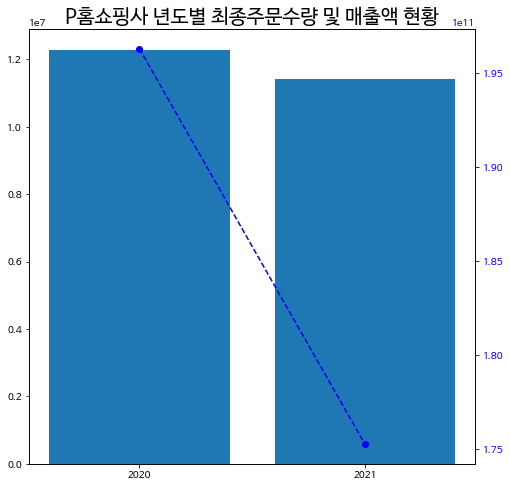

In [41]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax1 = fig.add_subplot()
  
xtick_label_position = list(range(len(years)))
ax1.set_xticks(xtick_label_position)  
ax1.set_xticklabels(years)
ax1.bar(xtick_label_position, counts)
 
color = 'blue'
ax2 = ax1.twinx()
ax2.plot(xtick_label_position, moneys, color=color, linestyle='--', marker='o')
ax2.tick_params(axis='y', labelcolor=color)
 
plt.title('P홈쇼핑사 년도별 최종주문수량 및 매출액 현황', fontsize=20)
plt.show()

## 최종주문수량 약 11%, 매출액 약 7%가 감소되었다. 2020년과 2021년 데이터만 존재하기에 아쉬운 면은 있으나 최종주문수량과 매출액은 감소형태를 띈다. 